# **Mulitiple linear Regression for The risk a Disease called Emphysema**

Imported libraries

In [242]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Load Data

In [243]:
filepath = "/content/sample_data/risk ofemphysema.csv"
df= pd.read_csv(filepath)


In [244]:
df.head(5)

,Risk,Age,Blood Pressure,Smoker
0,27,57,152,No
1,59,89,96,Yes
2,36,65,162,No
3,27,77,99,No
4,56,82,119,Yes


# Data Cleaning and validation

In [245]:
df = df.rename(columns={'Blood Pressure': 'Blood_Pressure'})
empyt_values = df.isnull().sum()
dunlicate_values = df.duplicated().sum()

if empyt_values.any():
  print("Empty values are found and they will be dropped")
  df = df.dropna()
else:
  print("No empty values found")

  if dunlicate_values.any():
    print("Duplicate values are found and they will be dropped")
    df = df.drop_duplicates()
  else:
    print("No duplicate values found")




No empty values found
No duplicate values found




# converting categorical data to numberic data: inclution of dummy varibales


In [246]:
df["Smoker"] = df["Smoker"].map({"Yes":1,"No":0})
df.head(3)


,Risk,Age,Blood_Pressure,Smoker
0,27,57,152,0
1,59,89,96,1
2,36,65,162,0


In [247]:
df.to_csv('riskofemphysema.Cleaned.csv', index=False)
pd.read_csv('riskofemphysema.Cleaned.csv').head(5)

,Risk,Age,Blood_Pressure,Smoker
0,27,57,152,0
1,59,89,96,1
2,36,65,162,0
3,27,77,99,0
4,56,82,119,1


In [255]:
x= df[["Age","Blood_Pressure", "Smoker"]] #independent variables
y =df["Risk"] # Target varible

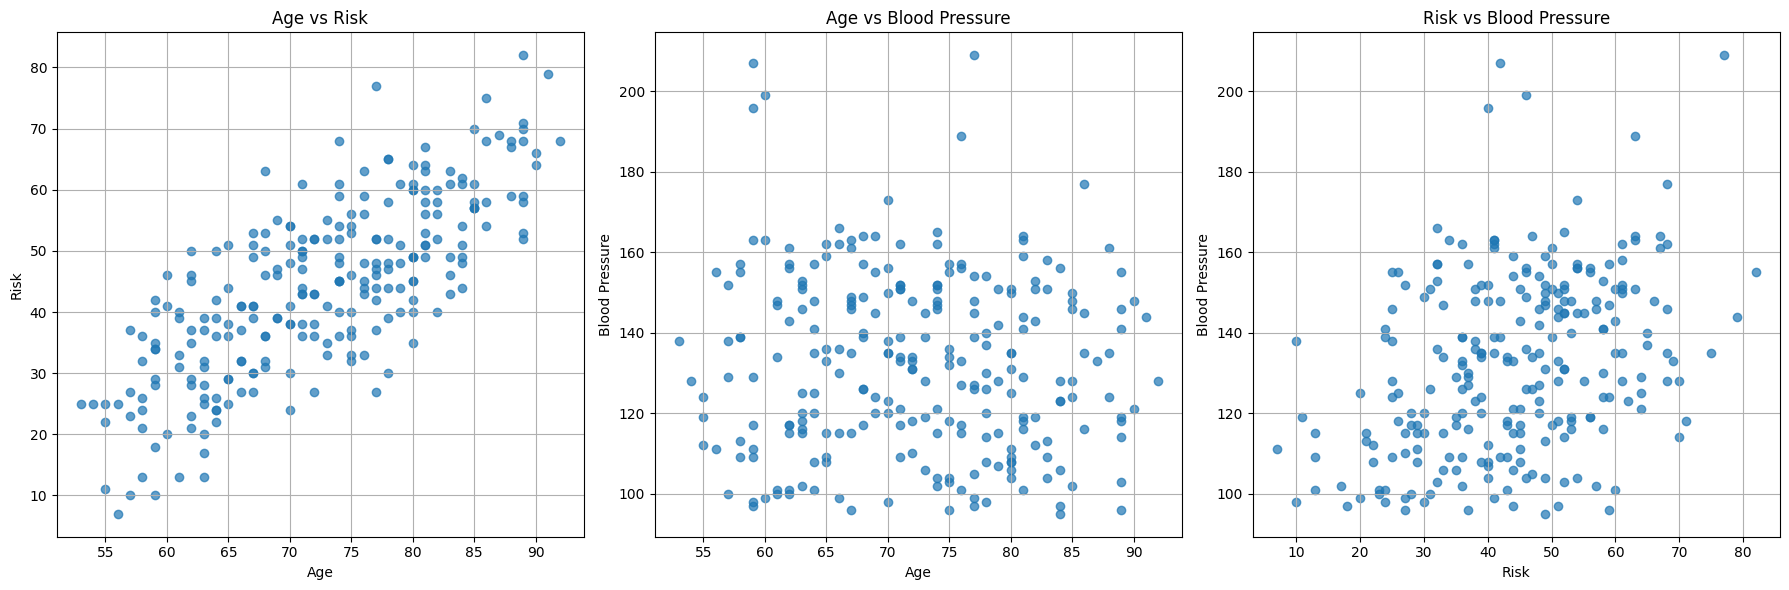

In [256]:
plt.figure(figsize=(18, 6))

# Plot 1: Age vs Risk
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
plt.scatter(df['Age'], df['Risk'], alpha=0.7)
plt.title('Age vs Risk')
plt.xlabel('Age')
plt.ylabel('Risk')
plt.grid(True)

# Plot 2: Age vs Blood Pressure
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
plt.scatter(df['Age'], df['Blood_Pressure'], alpha=0.7)
plt.title('Age vs Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.grid(True)

# Plot 3: Risk vs Blood Pressure
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
plt.scatter(df['Risk'], df['Blood_Pressure'], alpha=0.7)
plt.title('Risk vs Blood Pressure')
plt.xlabel('Risk')
plt.ylabel('Blood Pressure')
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [248]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x,y, test_size=0.2)

print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(196, 3)
(50, 3)
(196,)
(50,)


In [249]:
model = LinearRegression()
model.fit(X_Train, Y_Train)

LinearRegression()

In [250]:
Risk_prediction = model.predict(X_Test)

B0 = model.intercept_
B1 = model.coef_[0]
B2 = model.coef_[1]
B3 = model.coef_[2]

print("B0", B0, "Intercept")
print("B1", B1, "Coeffictent for Age")
print("B2", B2, "Coeffictent for Blood pressure")
print("B3", B3, "Coeffictent for For smoker")

B0 -79.70065467527809 Intercept
B1 1.1731169936690111 Coeffictent for Age
B2 0.2642802008411085 Coeffictent for Blood pressure
B3 8.211480517697805 Coeffictent for For smoker


The regression coefficients from your linear model represent the following:

B0 (Intercept) : (-76.59) This is the estimated 'Risk' when 'Age', 'Blood Pressure', and 'Smoker' status are all zero. In practical terms, an age or blood pressure of zero is not realistic, so the intercept primarily serves to adjust the regression lines position.

B1 (Coefficient for Age): (1.15) For every one-year increase in 'Age', the 'Risk' is estimated to increase by 1.15 units, assuming 'Blood_Pressure' and 'Smoker' status remain constant.

B2 (Coefficient for Blood_Pressure): (0.25) For every one-unit increase in 'Blood_Pressure', the 'Risk' is estimated to increase by 0.25 units, assuming 'Age' and 'Smoker' status remain constant.

B3 (Coefficient for Smoker): (8.38) This is the estimated difference in 'Risk' between a smoker (Smoker=1) and a non-smoker (Smoker=0). Specifically, being a smoker is associated with an increase of 8.38 units in 'Risk', assuming 'Age' and 'Blood_Pressure' are held constant.

These interpretations are based on the linear model: Risk = B0 + B1 * Age + B2 * Blood_Pressure + B3 * Smoker  .

In [251]:
print(Risk_prediction)

[41.59558025 55.39521044 44.25751498 45.69457374 51.62473435 51.16672723
 36.14853713 57.34237375 50.8833143  46.30684251 58.92771651 21.25915987
 44.19293934 58.03801245 35.50398054 45.15319669 57.16146348 60.99651521
 16.85010483 63.29166708 58.89542869 42.85206717 45.59771028 46.22347258
 42.78749153 34.52459046 47.01631318 23.42482203 46.22313414 18.55178222
 40.53845944 62.26649566 67.71951642 29.83212249 64.99334448 32.95804199
 13.59503405 43.1354801  39.36534245 58.28913756 56.15610166 32.10028731
 43.87723859 35.15565353 56.92980953 49.82653193 36.26453332 33.07369974
 24.59793902 58.71485686]


In [252]:
Predicted_Data = X_Test[['Age', 'Blood_Pressure', 'Smoker']].copy()
Predicted_Data['Predicted Risk'] = Risk_prediction

display(Predicted_Data.head(10))

,Age,Blood_Pressure,Smoker,Predicted Risk
121,66,166,0,41.595580
18,80,125,1,55.395210
69,73,145,0,44.257515
63,67,146,1,45.694574
184,68,164,1,51.624734
115,80,109,1,51.166727
46,76,101,0,36.148537
22,81,159,0,57.342374
130,73,139,1,50.883314
11,70,135,1,46.306843


In [253]:
actual_vs_predicted_df = pd.DataFrame({'Actual Risk': Y_Test, 'Predicted Risk': Risk_prediction})
actual_vs_predicted_df['Error'] = actual_vs_predicted_df['Actual Risk'] - actual_vs_predicted_df['Predicted Risk']
display(actual_vs_predicted_df.head())

,Actual Risk,Predicted Risk,Error
121,32,41.595580,-9.595580
18,64,55.395210,8.604790
69,52,44.257515,7.742485
63,51,45.694574,5.305426
184,63,51.624734,11.375266


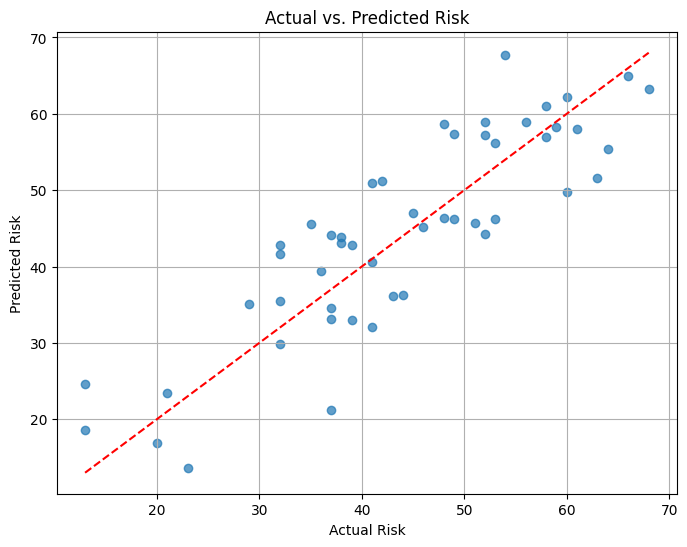

In [254]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_Test, Risk_prediction, alpha=0.7)
plt.plot([min(Y_Test), max(Y_Test)], [min(Y_Test), max(Y_Test)], 'r--') # Adds a diagonal red dashed line for perfect prediction
plt.title('Actual vs. Predicted Risk')
plt.xlabel('Actual Risk')
plt.ylabel('Predicted Risk')
plt.grid(True)
plt.show()

In [239]:
# Get input values from the user
age_input = int(input("Enter Age: "))
blood_pressure_input = int(input("Enter Blood Pressure: "))
smoker_input_str = input("Is the patient a Smoker? (Yes/No): ").lower()
smoker_input = 1 if smoker_input_str == 'yes' else 0

# Create a DataFrame for the new input
new_data = pd.DataFrame({
    'Age': [age_input],
    'Blood_Pressure': [blood_pressure_input],
    'Smoker': [smoker_input]
})

# Predict the Risk
predicted_risk = model.predict(new_data)

print(f"\nPredicted Risk for Age={age_input}, Blood Pressure={blood_pressure_input}, Smoker={smoker_input_str.capitalize()}: {predicted_risk[0]:.2f}")

Enter Age: 12
Enter Blood Pressure: 15
Is the patient a Smoker? (Yes/No): 1

Predicted Risk for Age=12, Blood Pressure=15, Smoker=1: -58.25


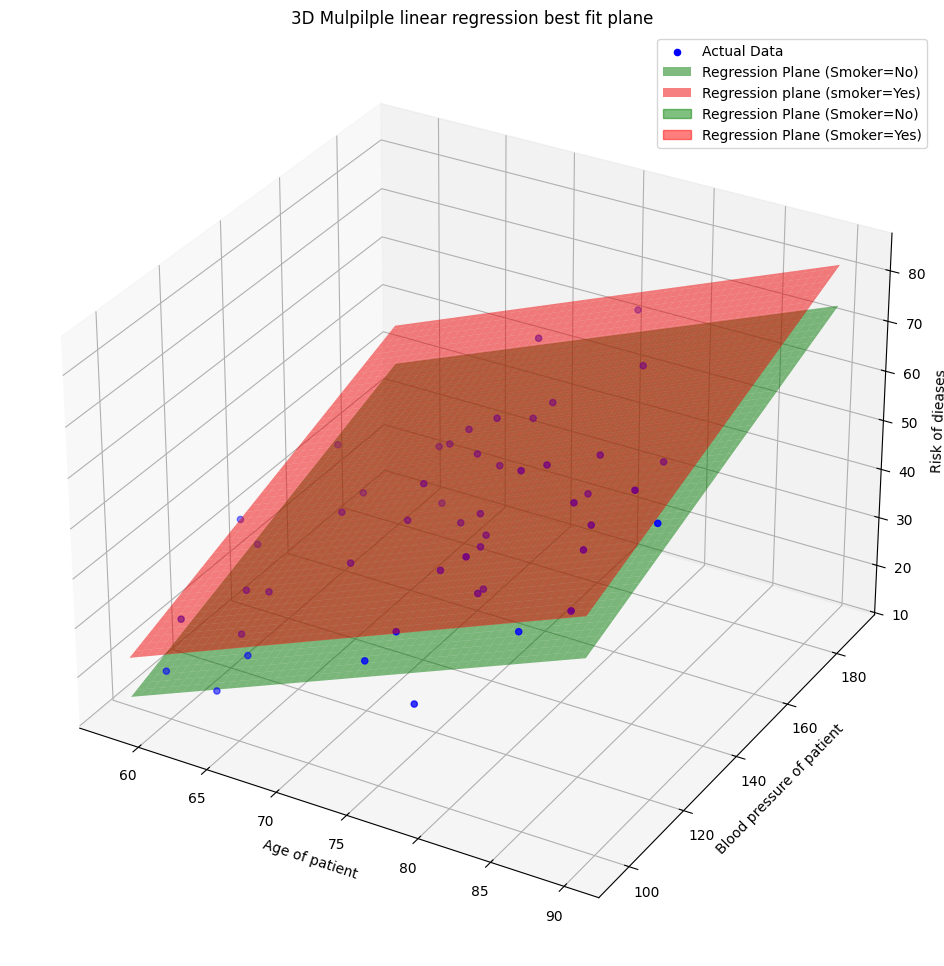

In [240]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X_Test["Age"], X_Test["Blood_Pressure"],Y_Test, color= 'blue', label = 'Actual Data')

range_x1 = np.linspace(X_Test["Age"].min(), X_Test["Age"].max(),100)
range_x2 = np.linspace(X_Test["Blood_Pressure"].min(), X_Test["Blood_Pressure"].max(),100)
x1, x2, = np.meshgrid(range_x1, range_x2)

z= B0 + B1 * x1 + B2 * x2 + B3* 0

ax.plot_surface(x1, x2, z, alpha=0.5, color='green', label='Regression Plane (Smoker=No)')

z1 =B0 + B1*x1 + B2*x2 + B3 *1

ax.plot_surface(x1,x2, z1, alpha = 0.5, color = 'red', label = 'Regression plane (smoker=Yes)')

# Create custom legend handles for the surface plots
surface_patch_smoker0 = Patch(color='green', alpha=0.5, label='Regression Plane (Smoker=No)')
surface_patch_smoker1 = Patch(color='red', alpha=0.5, label='Regression Plane (Smoker=Yes)')

# Get existing handles and labels from scatter plot and add custom patches
handles, labels = ax.get_legend_handles_labels()
handles.extend([surface_patch_smoker0, surface_patch_smoker1])
ax.legend(handles=handles, loc='best')



ax.set_xlabel('Age of patient')
ax.set_ylabel('Blood pressure of patient')
ax.set_zlabel('Risk of dieases')
ax.set_title('3D Mulpilple linear regression best fit plane')
plt.show()








In [241]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_Test, Risk_prediction)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(Y_Test, Risk_prediction))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate R-squared
r_squared = r2_score(Y_Test, Risk_prediction)
print(f"R-squared: {r_squared:.4f}")

# Calculate Adjusted R-squared
n = len(Y_Test) # Number of observations
p = X_Test.shape[1] # Number of predictors (independent variables)

if (n - p - 1) > 0: # Ensure denominator is not zero or negative
    adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
    print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")
else:
    print("Cannot calculate Adjusted R-squared: Not enough degrees of freedom (n <= p + 1).")

Mean Absolute Error (MAE): 5.1784
Root Mean Squared Error (RMSE): 5.9436
R-squared: 0.8213
Adjusted R-squared: 0.8096
